In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("results.csv", sep=';')
df2 = pd.read_csv("training_results.csv", sep=';')

In [3]:
cnn = df[ df['model'] == 'CNN' ]
res = df[ df['model'] == 'RESNET' ]
inc = df[ df['model'] == 'INCEPTION' ]
enc = df[ df['model'] == 'ENCODER' ]

In [4]:
training_sets = df[ 'training_set' ].unique()
print(len(training_sets))

75


In [45]:
pre_trained_sets = df[ 'pre_trained_set' ].unique()

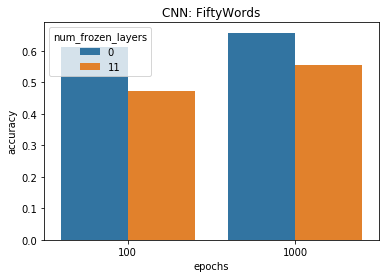

In [47]:
cnn_set = cnn[ cnn[ 'training_set' ] == training_sets[ 0 ] ]
    
p = sns.barplot( x = 'epochs', y = 'accuracy', hue = 'num_frozen_layers', data = cnn_set, ci=0.95 ) 
leg = p.get_legend()
leg.set_title( "num_frozen_layers" )
labs = leg.texts
p.set_title( "CNN: " + training_sets[ 0 ] )

p.axes.xaxis.label.set_text( "epochs" )
p.axes.yaxis.label.set_text( "accuracy" )

In [129]:
normal_training_100 = df2[ df2[ 'epochs' ] == 100 ]
normal_training_1000 = df2[ df2[ 'epochs' ] == 1000 ]
print( normal_training_100 )

                 set      model  epochs    loss  accuracy  val_loss  \
1              Adiac  inception     100  0.2978    0.9231   16.9258   
5              Adiac        cnn     100  1.4428    0.6487    2.5723   
9              Adiac     resnet     100  0.4754    0.8487    1.6116   
13             Adiac    encoder     100  1.9746    0.3949    1.8634   
17         ArrowHead  inception     100  0.0181    1.0000    7.2882   
...              ...        ...     ...     ...       ...       ...   
2029  SmoothSubspace    encoder     100  0.6277    0.9800    0.6023   
2033             UMD  inception     100  0.0034    1.0000    7.1441   
2037             UMD        cnn     100  0.1444    1.0000    2.1149   
2041             UMD     resnet     100  0.0101    1.0000    3.5390   
2045             UMD    encoder     100  0.2595    1.0000    0.5094   

      val_accuracy  
1           0.0256  
5           0.3223  
9           0.4987  
13          0.4348  
17          0.3029  
...            ...  


In [81]:
df_100 = df[ df[ 'epochs' ] == 100 ]
df_1000 = df[ df[ 'epochs' ] == 1000 ]

df_100_none = df_100[ df_100[ 'num_frozen_layers' ] == 0 ]
df_1000_none = df_1000[ df_1000[ 'num_frozen_layers' ] == 0 ]
df_100_all = df_100[ df_100[ 'num_frozen_layers' ] != 0 ]
df_1000_all = df_1000[ df_1000[ 'num_frozen_layers' ] != 0 ]

In [84]:
def show_bar( set, name ):
    
    s = sns.barplot( x = 'pre_trained_set', y = 'accuracy', hue = 'model', data = set, ci=0.95 ) 
    leg = p.get_legend()
    leg.set_title( "model" )
    labs = leg.texts
    s.set_title( name )

    s.axes.xaxis.label.set_text( "pre_trained_set" )
    s.axes.yaxis.label.set_text( "accuracy" )

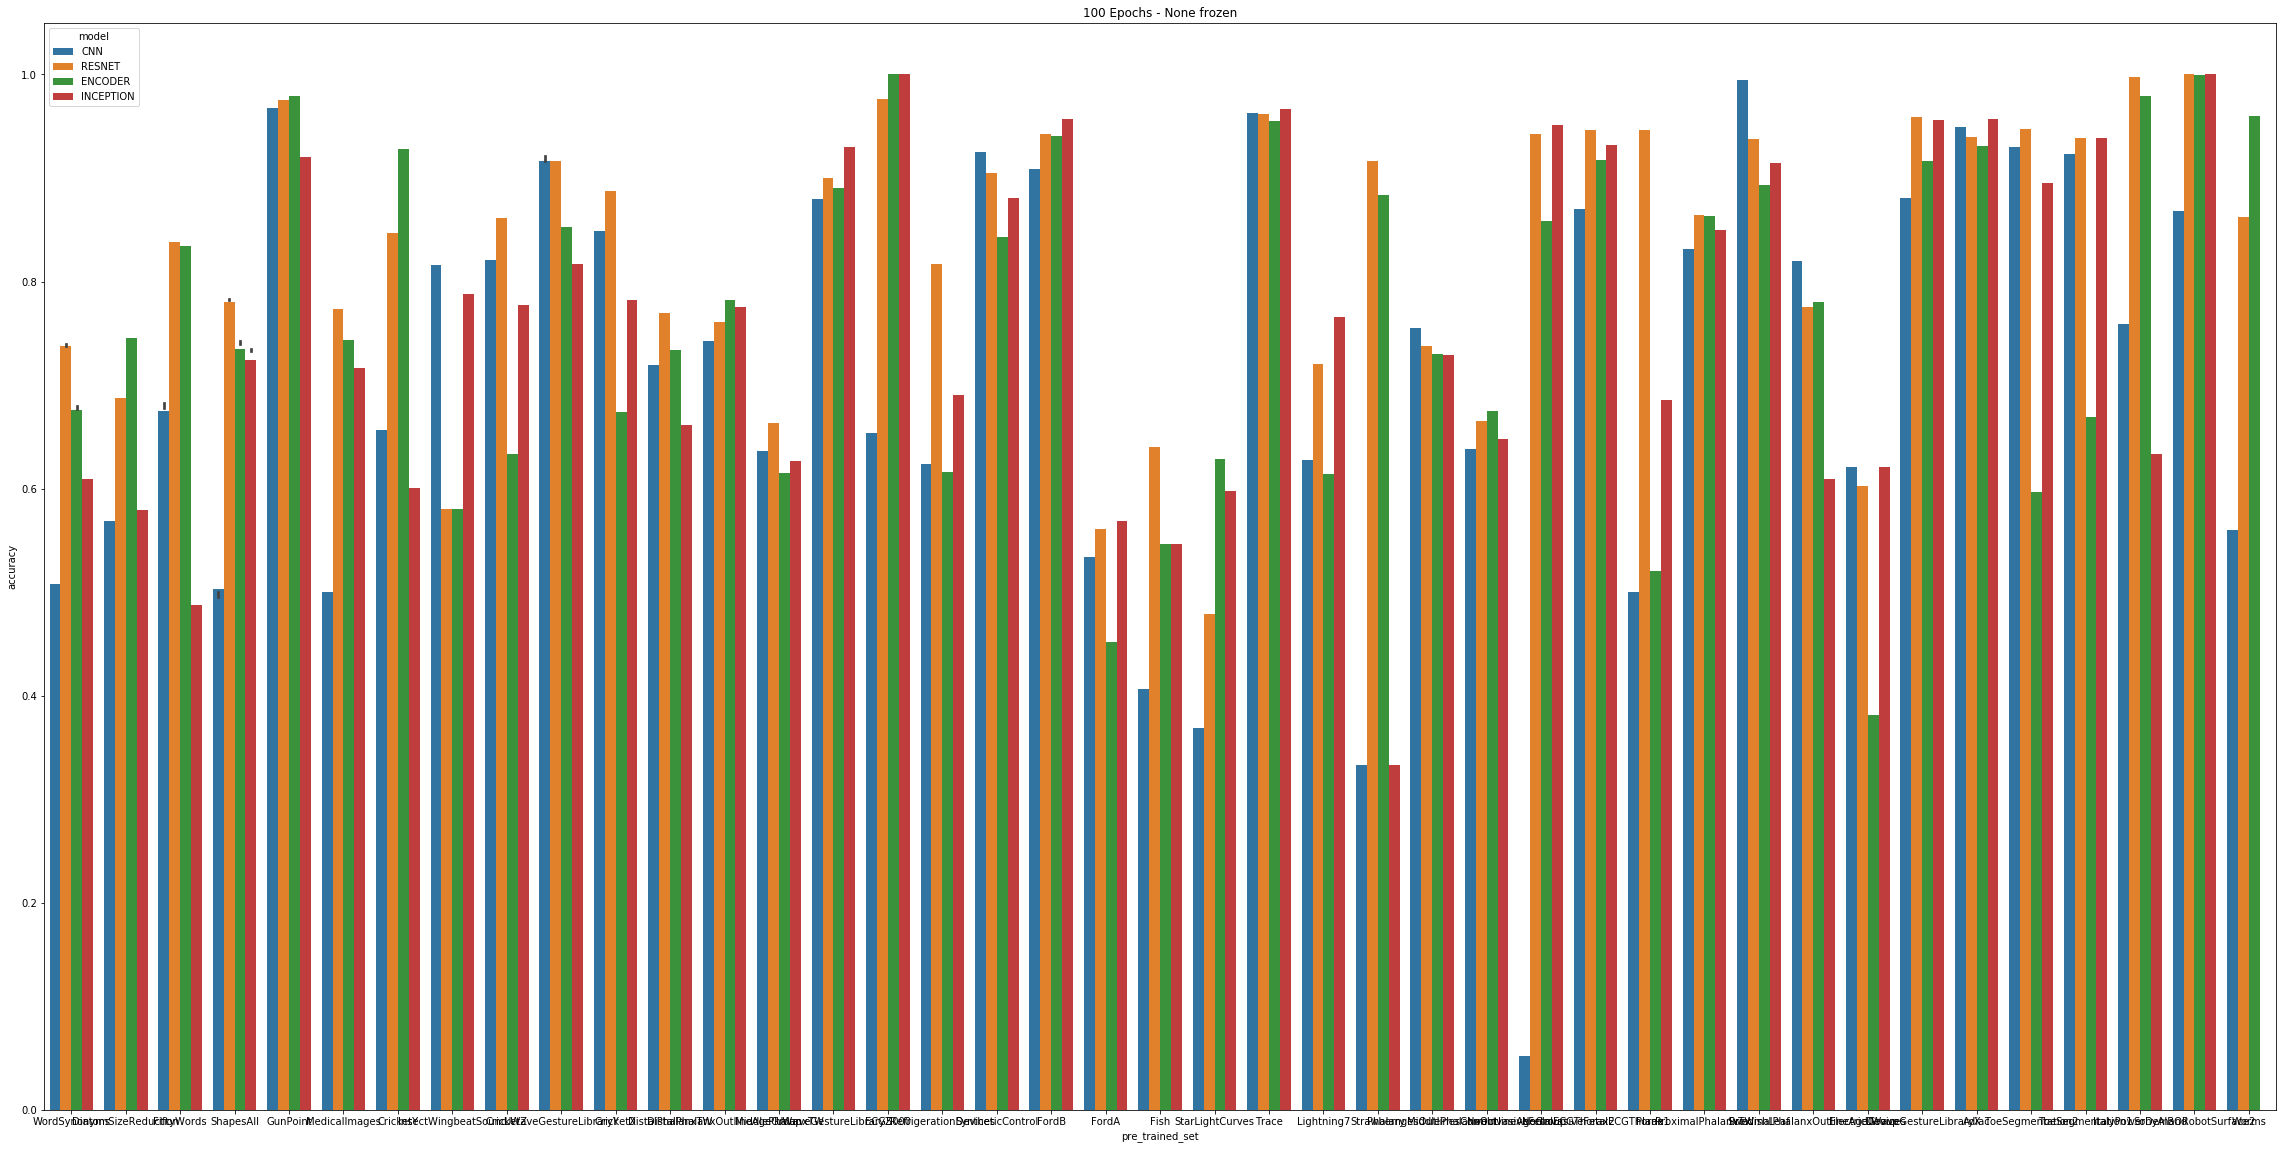

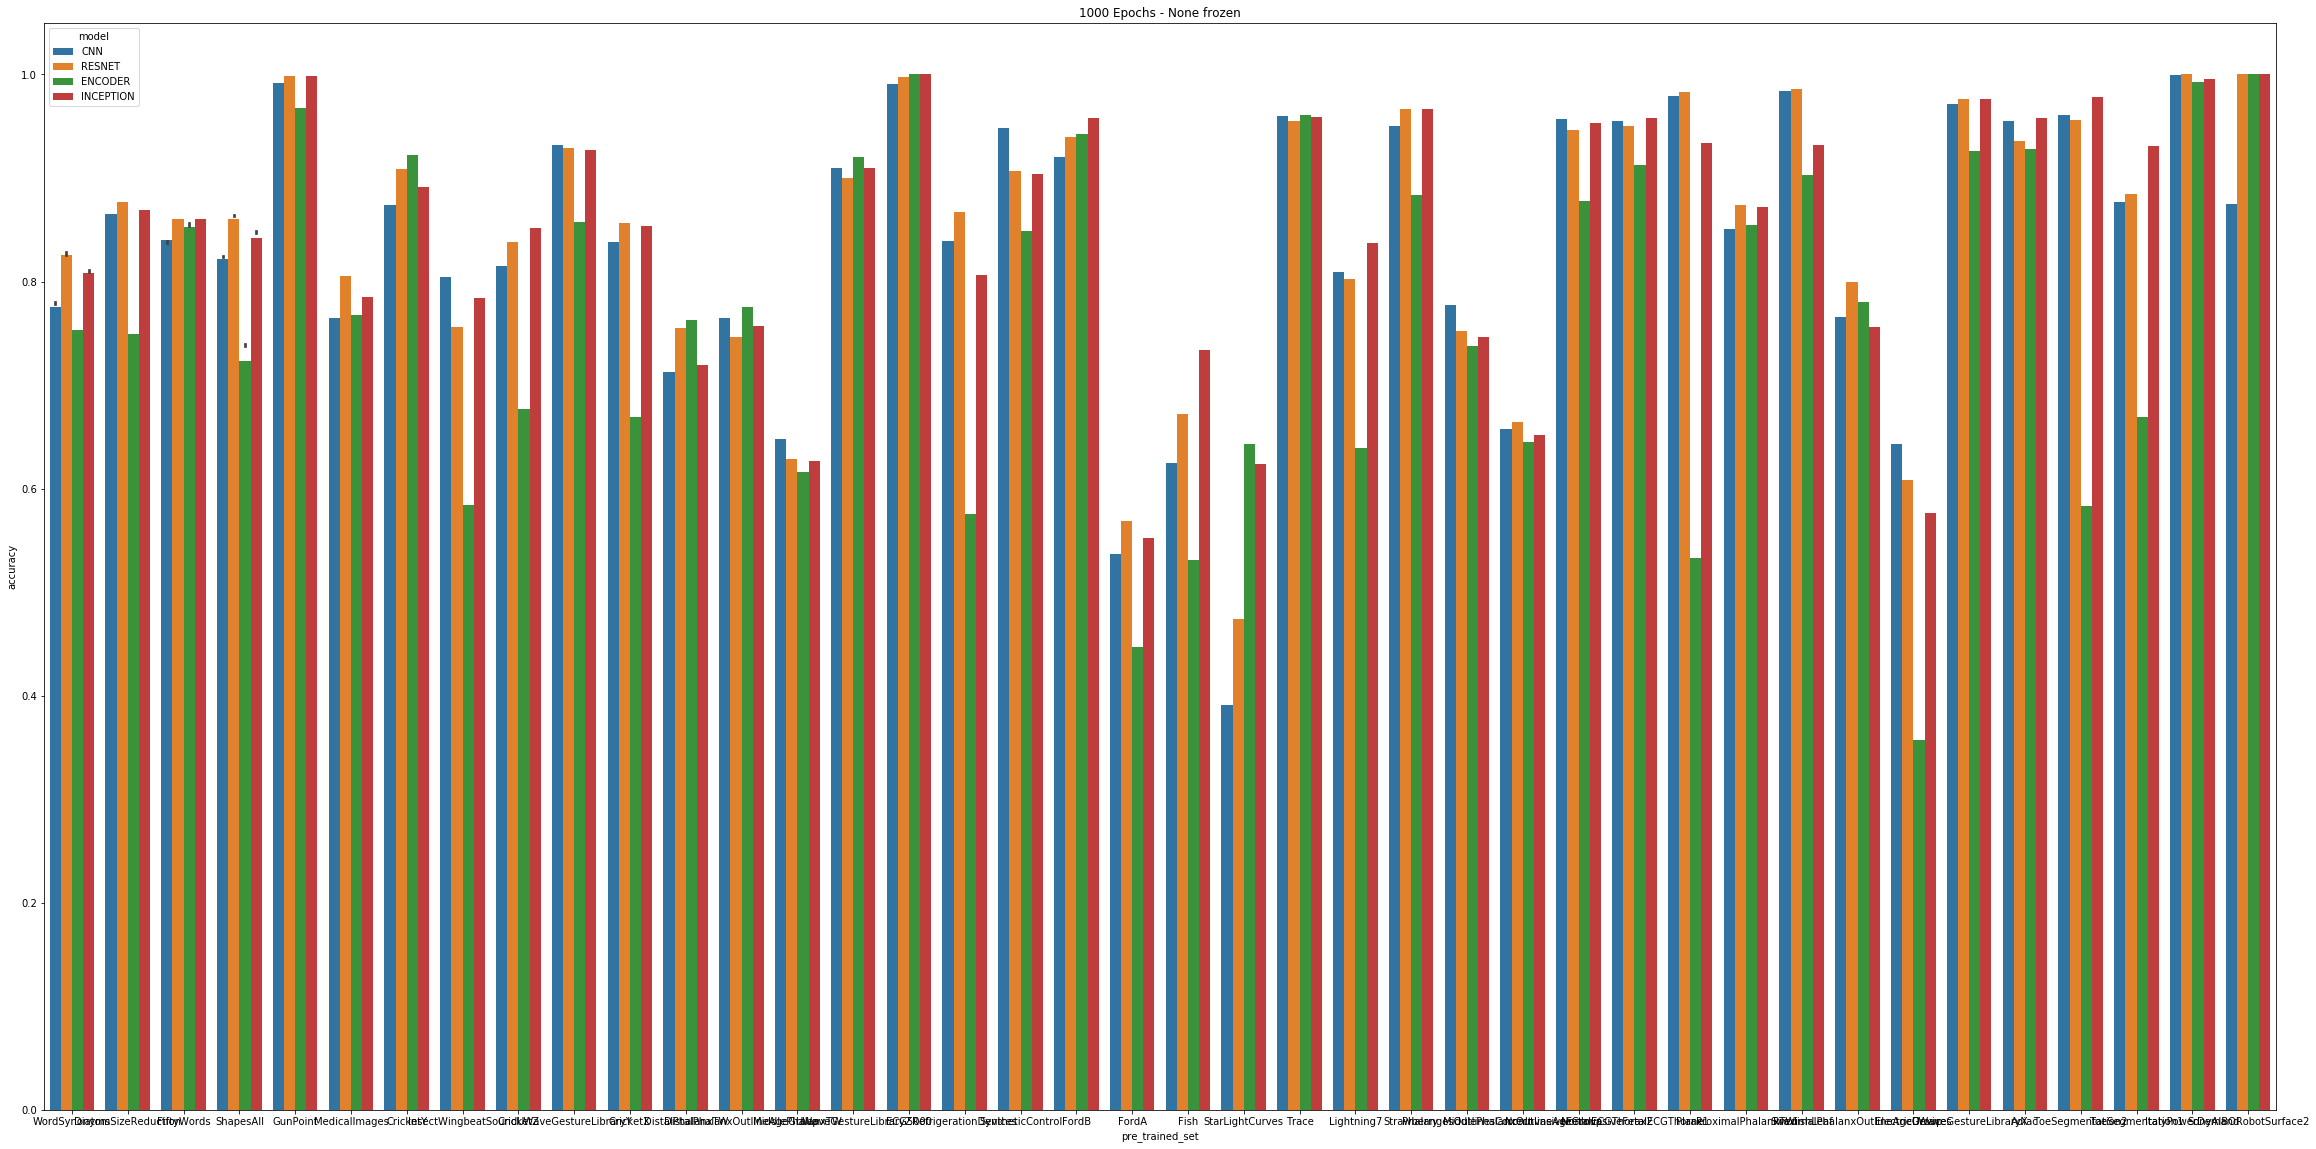

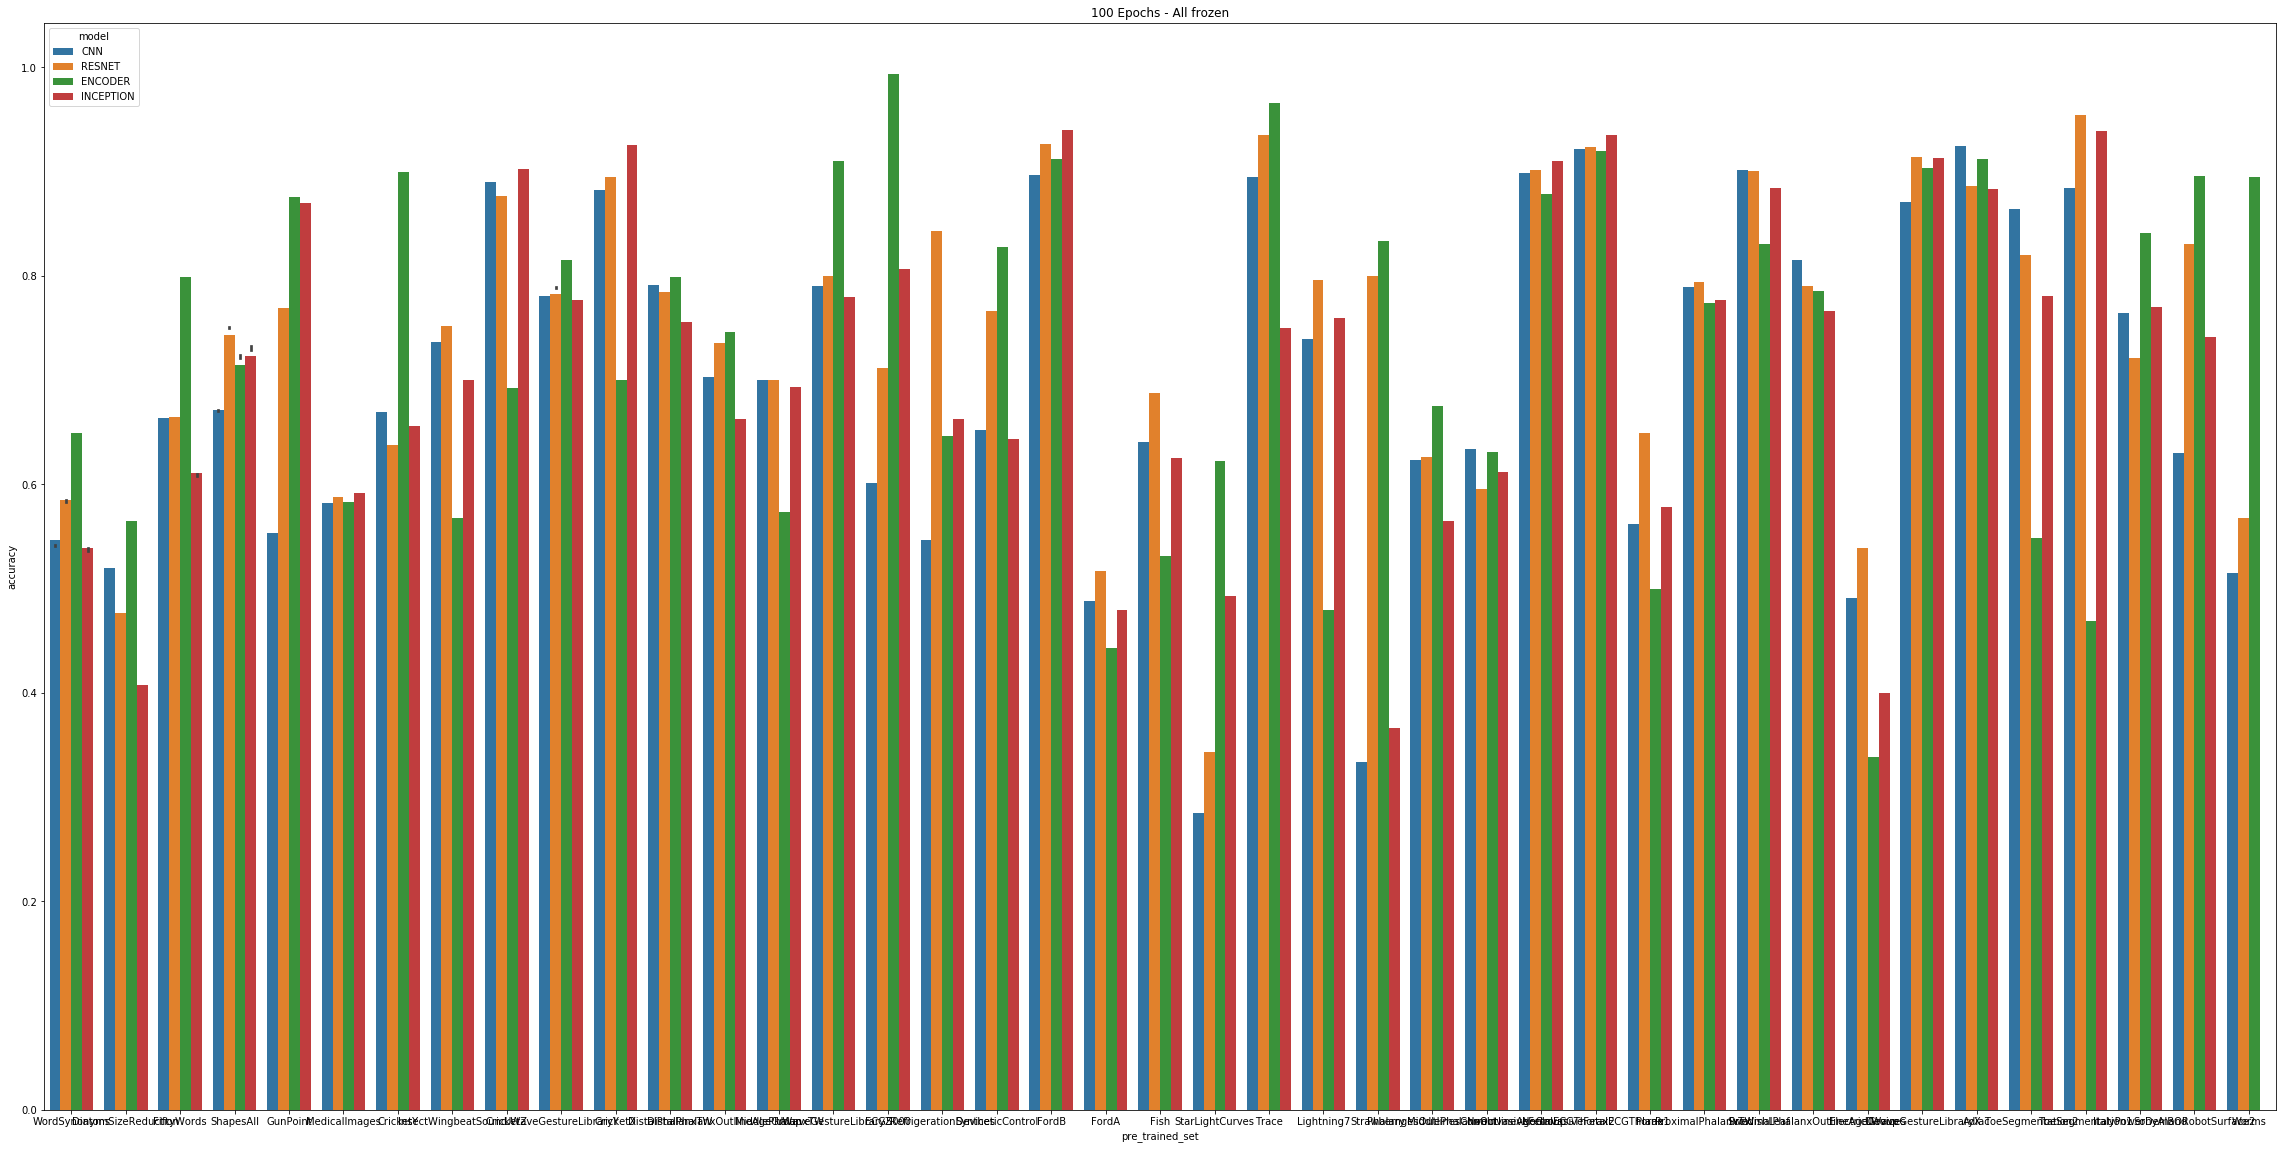

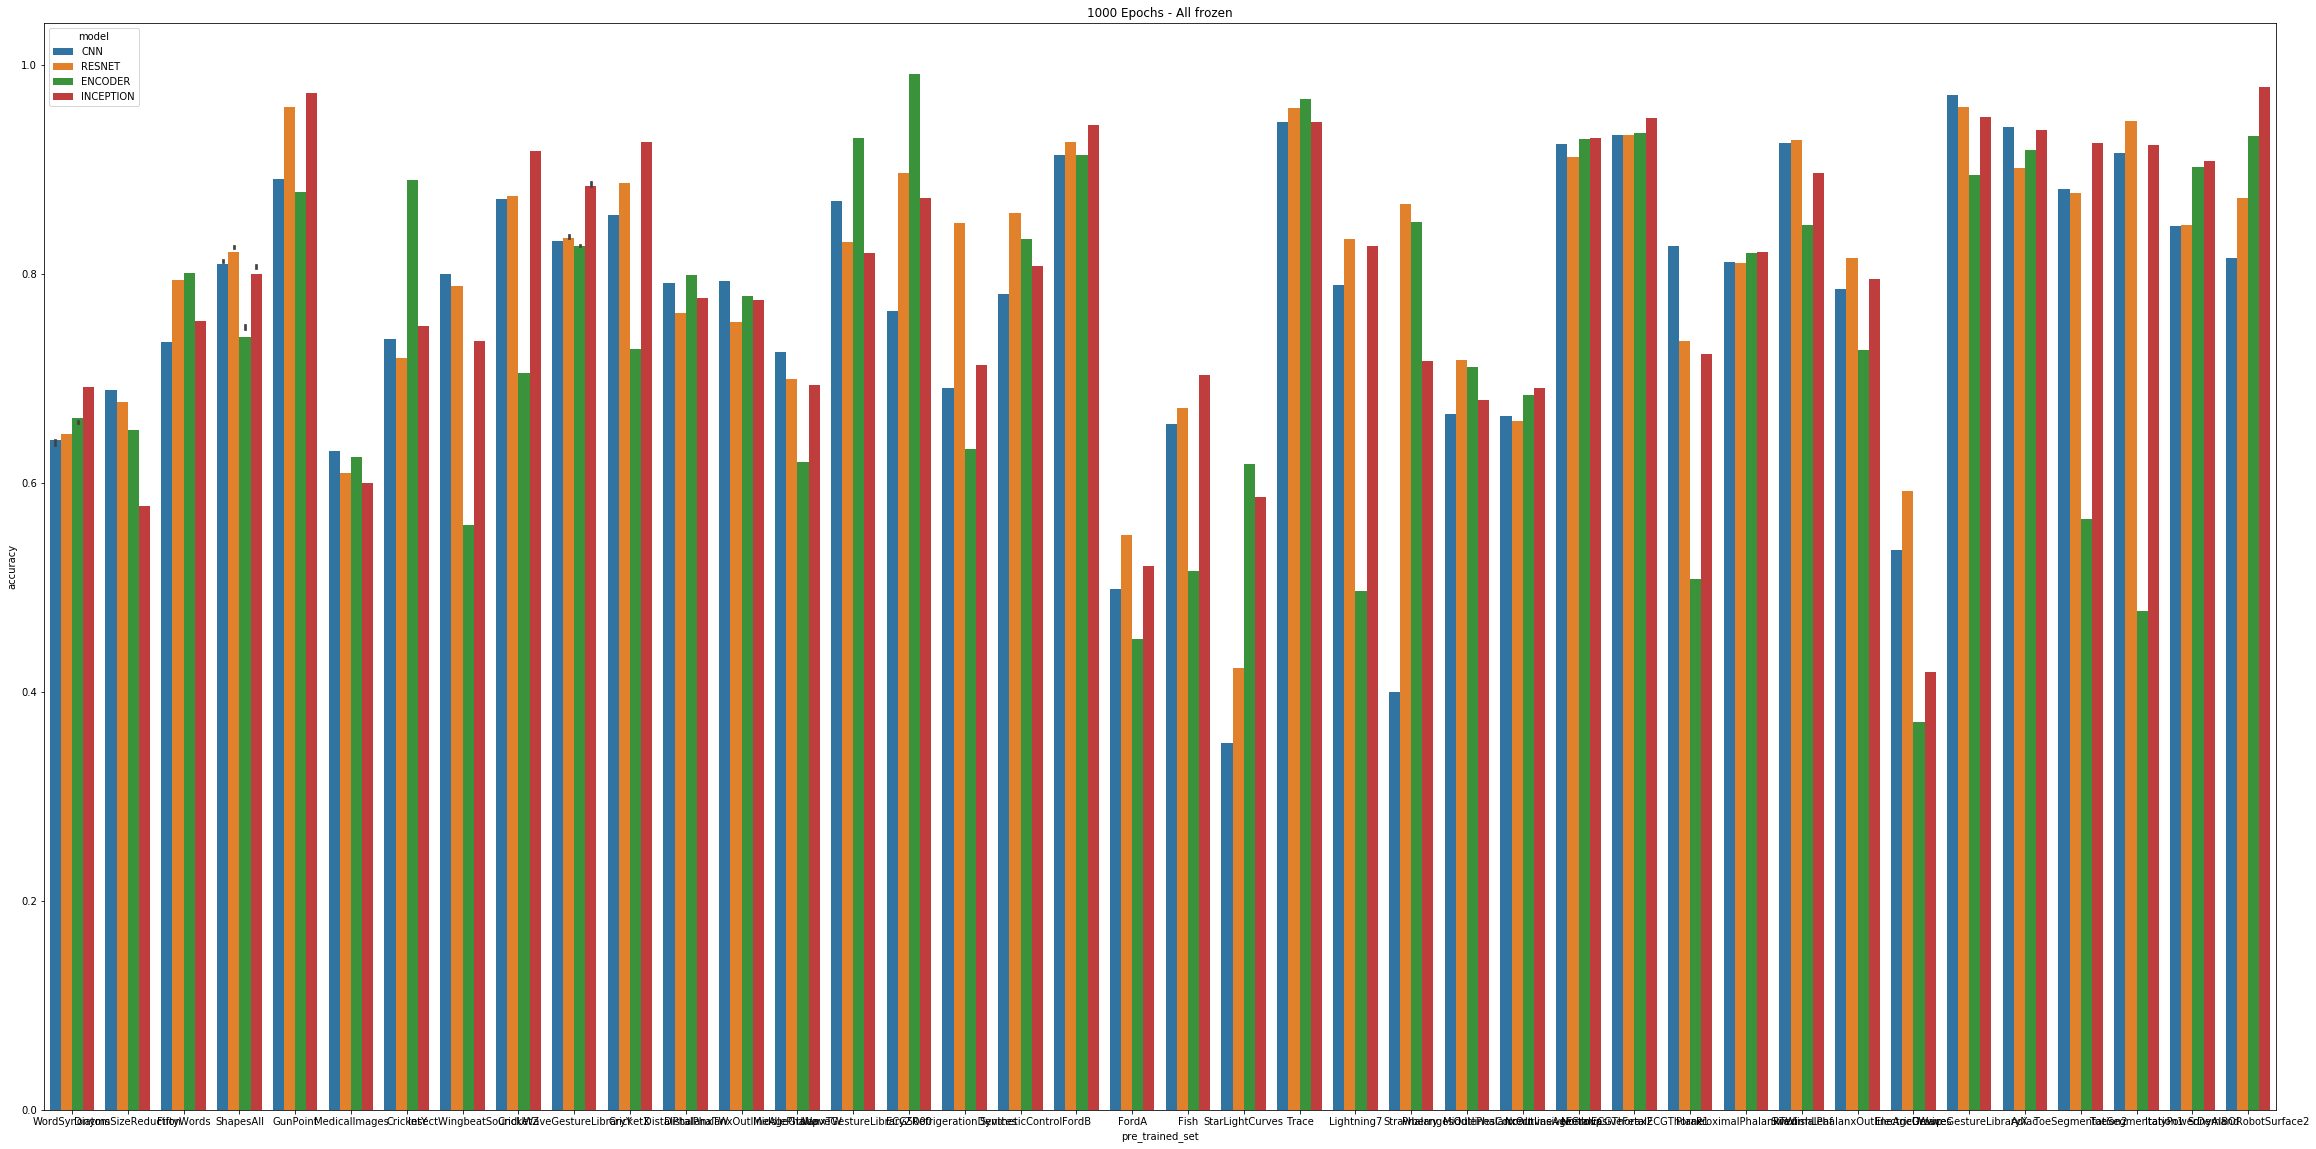

In [89]:
plt.rcParams[ "figure.figsize" ] = [ 40, 20 ]

show_bar( df_100_none, '100 Epochs - None frozen' )
plt.show()

show_bar( df_1000_none, '1000 Epochs - None frozen' )
plt.show()

show_bar( df_100_all, '100 Epochs - All frozen' )
plt.show()

show_bar( df_1000_all, '1000 Epochs - All frozen' )
plt.show()

In [97]:
def summary_frozen( set, name ):
    
    p = sns.barplot( x = 'model', y = 'accuracy', data = set, capsize = 0.05, errcolor = 'gray', errwidth = 2 ) 
    p.set_title( name )
    s.set_title( name )

    p.axes.yaxis.label.set_text( "accuracy" )

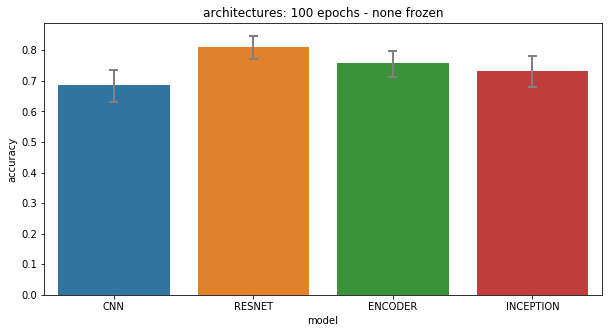

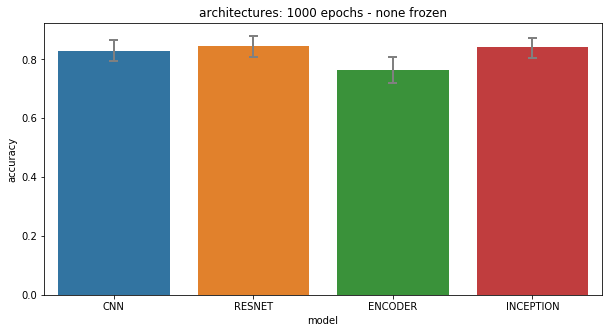

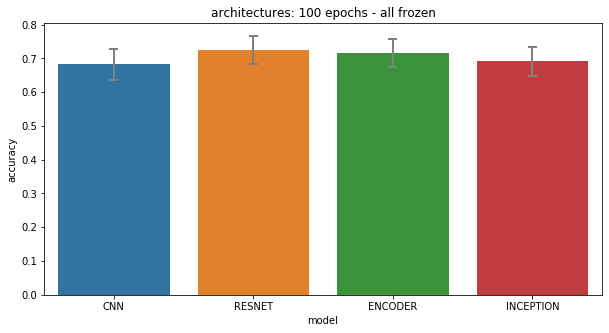

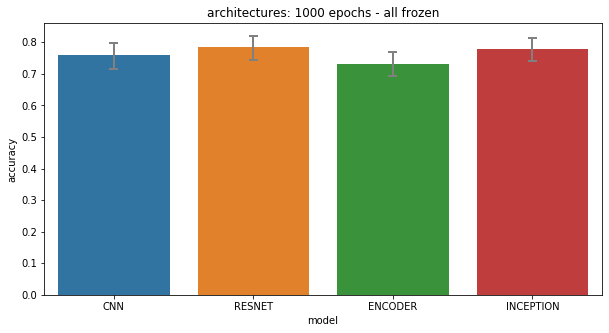

In [99]:
plt.rcParams[ "figure.figsize" ] = [ 10, 5 ]

summary( df_100_none, '100 epochs - none frozen' )
plt.show()

summary( df_1000_none, '1000 epochs - none frozen' )
plt.show()

summary( df_100_all, '100 epochs - all frozen' )
plt.show()

summary( df_1000_all, '1000 epochs - all frozen' )
plt.show()

In [131]:
avg_transfer_100_none_cnn = df_100_none[ df_100_none[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_100_none_res = df_100_none[ df_100_none[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_100_none_inc = df_100_none[ df_100_none[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_100_none_enc = df_100_none[ df_100_none[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_transfer_1000_none_cnn = df_1000_none[ df_1000_none[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_1000_none_res = df_1000_none[ df_1000_none[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_1000_none_inc = df_1000_none[ df_1000_none[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_1000_none_enc = df_1000_none[ df_1000_none[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_transfer_100_all_cnn = df_100_all[ df_100_all[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_100_all_res = df_100_all[ df_100_all[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_100_all_inc = df_100_all[ df_100_all[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_100_all_enc = df_100_all[ df_100_all[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_transfer_1000_all_cnn = df_1000_all[ df_1000_all[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_1000_all_res = df_1000_all[ df_1000_all[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_1000_all_inc = df_1000_all[ df_1000_all[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_1000_all_enc = df_1000_all[ df_1000_all[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_100_training_cnn = normal_training_100[ normal_training_100[ 'model' ] == 'cnn' ][ 'val_accuracy' ].mean()
avg_100_training_res = normal_training_100[ normal_training_100[ 'model' ] == 'resnet' ][ 'val_accuracy' ].mean()
avg_100_training_inc = normal_training_100[ normal_training_100[ 'model' ] == 'inception' ][ 'val_accuracy' ].mean()
avg_100_training_enc = normal_training_100[ normal_training_100[ 'model' ] == 'encoder' ][ 'val_accuracy' ].mean()

avg_1000_training_cnn = normal_training_1000[ normal_training_1000[ 'model' ] == 'cnn' ][ 'val_accuracy' ].mean()
avg_1000_training_res = normal_training_1000[ normal_training_1000[ 'model' ] == 'resnet' ][ 'val_accuracy' ].mean()
avg_1000_training_inc = normal_training_1000[ normal_training_1000[ 'model' ] == 'inception' ][ 'val_accuracy' ].mean()
avg_1000_training_enc = normal_training_1000[ normal_training_1000[ 'model' ] == 'encoder' ][ 'val_accuracy' ].mean()

In [132]:
avg = pd.DataFrame( { 'model': [ 'CNN', 'CNN', 'CNN', 'CNN', 'RESNET', 'RESNET', 'RESNET', 'RESNET', 'INCEPTION', 'INCEPTION', 'INCEPTION', 'INCEPTION', 'ENCODER', 'ENCODER', 'ENCODER', 'ENCODER', 'CNN', 'CNN', 'RESNET', 'RESNET', 'INCEPTION', 'INCEPTION', 'ENCODER', 'ENCODER' ],
                    'epochs': [ '100', '100', '1000', '1000', '100', '100', '1000', '1000', '100', '100', '1000', '1000', '100', '100', '1000', '1000', '100', '1000', '100', '1000', '100', '1000', '100', '1000' ],
                    'num_frozen_layers': [ 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training' ],
                    'mean_accuracy' : [ avg_transfer_100_none_cnn, avg_transfer_100_all_cnn, avg_transfer_1000_none_cnn , avg_transfer_1000_all_cnn, avg_transfer_100_none_res, avg_transfer_100_all_res, avg_transfer_1000_none_res , avg_transfer_1000_all_res,
                                      avg_transfer_100_none_inc, avg_transfer_100_all_inc, avg_transfer_1000_none_inc , avg_transfer_1000_all_inc, avg_transfer_100_none_enc, avg_transfer_100_all_enc, avg_transfer_1000_none_enc , avg_transfer_1000_all_enc,
                                      avg_100_training_cnn, avg_1000_training_cnn, avg_100_training_res, avg_1000_training_res, avg_100_training_inc, avg_1000_training_inc, avg_100_training_enc, avg_1000_training_enc ] } )
print( avg )

        model epochs num_frozen_layers  mean_accuracy
0         CNN    100              None       0.685317
1         CNN    100               All       0.682063
2         CNN   1000              None       0.829775
3         CNN   1000               All       0.759396
4      RESNET    100              None       0.811837
5      RESNET    100               All       0.724146
6      RESNET   1000              None       0.845117
7      RESNET   1000               All       0.784236
8   INCEPTION    100              None       0.730901
9   INCEPTION    100               All       0.690691
10  INCEPTION   1000              None       0.840971
11  INCEPTION   1000               All       0.778234
12    ENCODER    100              None       0.758963
13    ENCODER    100               All       0.717120
14    ENCODER   1000              None       0.764116
15    ENCODER   1000               All       0.731814
16        CNN    100          Training       0.416989
17        CNN   1000        

In [138]:
avg[ 'Hue' ] = avg[ 'epochs' ] + ' - ' + avg[ 'num_frozen_layers' ]
avg = avg.sort_values( by = 'Hue' )
print( avg )

        model epochs num_frozen_layers  mean_accuracy              Hue
1         CNN    100               All       0.682063        100 - All
5      RESNET    100               All       0.724146        100 - All
9   INCEPTION    100               All       0.690691        100 - All
13    ENCODER    100               All       0.717120        100 - All
0         CNN    100              None       0.685317       100 - None
4      RESNET    100              None       0.811837       100 - None
8   INCEPTION    100              None       0.730901       100 - None
12    ENCODER    100              None       0.758963       100 - None
20  INCEPTION    100          Training       0.426196   100 - Training
18     RESNET    100          Training       0.486694   100 - Training
16        CNN    100          Training       0.416989   100 - Training
22    ENCODER    100          Training       0.649077   100 - Training
15    ENCODER   1000               All       0.731814       1000 - All
11  IN

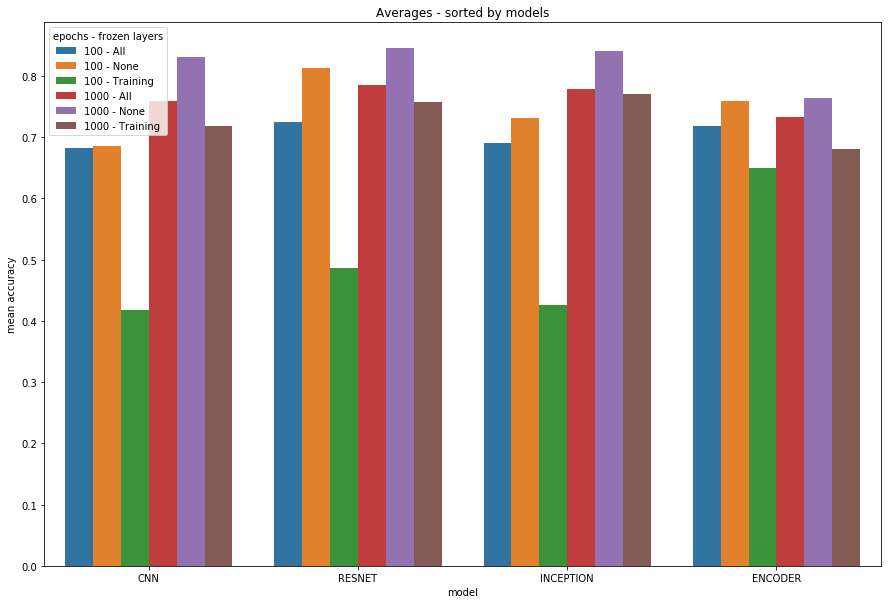

In [139]:
plt.rcParams[ "figure.figsize" ] = [ 15, 10 ]

s = sns.barplot( x = 'model', y = 'mean_accuracy', hue = 'Hue', data = avg, ci=0.95 )
s.get_legend().set_title( "epochs - frozen layers" )
s.set_title( 'Averages - sorted by models' )

s.axes.xaxis.label.set_text( "model" )
s.axes.yaxis.label.set_text( "mean accuracy" )

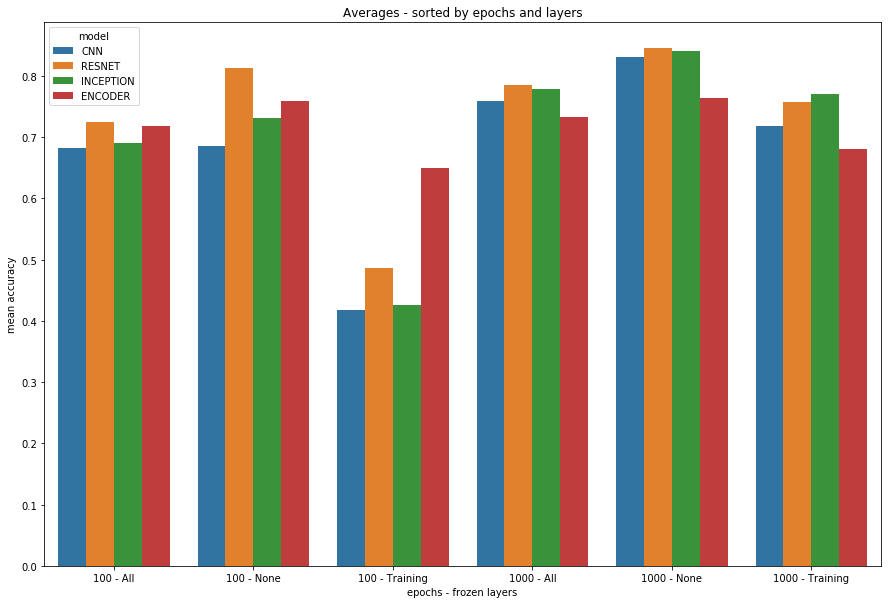

In [140]:
s = sns.barplot( x = 'Hue', y = 'mean_accuracy', hue = 'model', data = avg, ci=0.95 )
s.get_legend().set_title( "model" )
s.set_title( 'Averages - sorted by epochs and layers' )

s.axes.xaxis.label.set_text( "epochs - frozen layers" )
s.axes.yaxis.label.set_text( "mean accuracy" )